# **Standardization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
197,20,36000,0
114,42,80000,0
23,45,22000,1
67,23,82000,0
5,27,58000,0


In [ ]:
x = df.drop('Purchased',axis=1)

In [ ]:
x.head(10)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [ ]:
y = df['Purchased']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 ,random_state=0)

x_train.shape , x_test.shape

((280, 2), (120, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [ ]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [ ]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


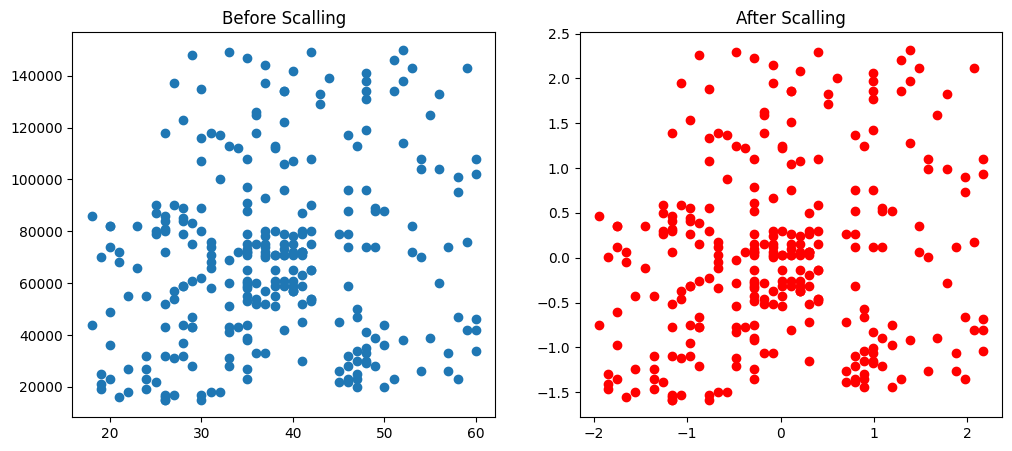

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scalling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scalling')

plt.show()

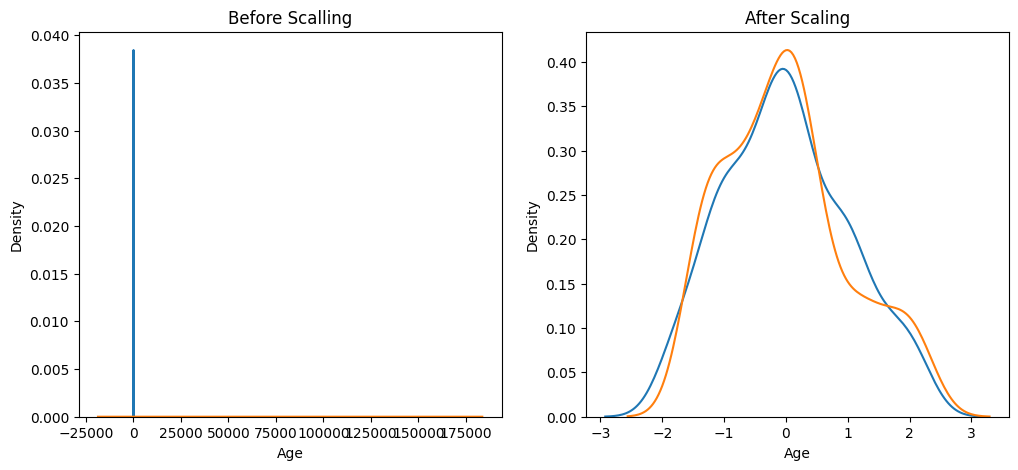

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# **Why Scalling is important ??**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train,y_train)
lr.fit(x_train_scaled,y_train)



LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.3416666666666667
Scaled 0.8666666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc_scaled = DecisionTreeClassifier()

In [ ]:
dc.fit(x_train,y_train)
dc_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dc.predict(x_test)
y_pred_scaled = dc_scaled.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


# **Effect Of An Outlier**

In [ ]:
df = df.append(pd.DataFrame({'Age':[5,90,95] , 'EstimatedSalary':[1000,250000,350000] , 'Purchased':[0,1,1]}))

<ipython-input-55-bc5fec9eb11f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95] , 'EstimatedSalary':[1000,250000,350000] , 'Purchased':[0,1,1]}))


In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,250000,1


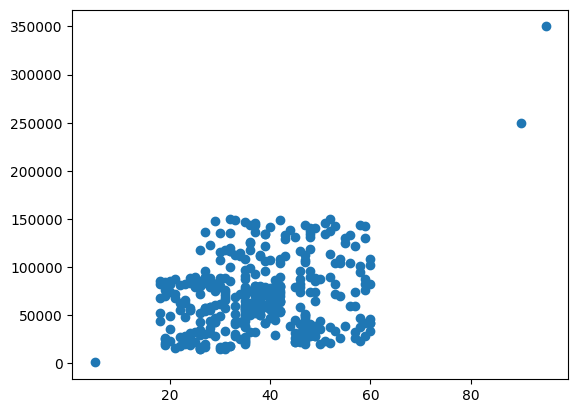

In [ ]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [ ]:
x = df.drop('Purchased',axis=1)

In [ ]:
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 ,random_state=0)

x_train.shape , x_test.shape

((282, 2), (121, 2))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

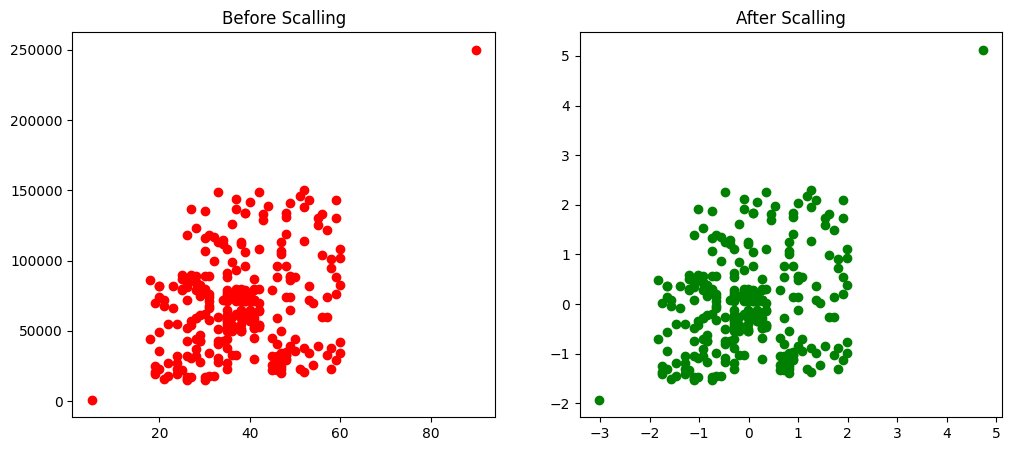

In [ ]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'],color='red')
ax1.set_title('Before Scalling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')
ax2.set_title('After Scalling')

plt.show()